# **Manejo de DataSet de vinos para predicción de la calidad**

<a href="https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009">**DataSet Kaggle**</a>

1. [Obtención de datos](#obtención-de-datos)

2. [Lectura de datos y analisis de ellos](#lectura-de-datos-y-analisis-de-ellos)
    1. [Picos](#picos)
     <p></p>

3. [Visualización de datos](#visualización-de-datos)
    1. [Scatter](#scatter-de-ácido-volátil-ácido-citrico-y-calidad-del-vino)

    2. [BoxPlot](#boxplot-de-coorrelaciones)

    3. [Mátriz de coorrelación](#matriz-de-correlación-y-mapa-de-calor)
    
    4. [Scatter Matrix](#scatter-matrix)

4. [Experimentación con columnas](#experimentación-con-columnas)

5. [Preparación de datos](#preparación-de-datos)
    1. [Limpieza](#limpieza)
    
    2. [División de datos](#división-de-datos)

6. [Definición de los modelos](#definición-de-los-modelos)
    1. [LINEAL](#lineal)

    2. [ÁRBOL DE DECISIONES](#árbol-de-decisiones)

    3. [VALIDACIÓN CRUZADA DEL ÁRBOL DE DECISIONES](#validación-cruzada-del-árbol-de-decisiones)

    4. [RANDOM FOREST MODELO](#random-forest-modelo)

    5. [SVR](#svr)

    6. [XGBOOST](#xgboost)

# **Obtención de datos**

Descargamos el dataset de forma local y cogemos su ruta para leer el .csv y meterlo a un DataFrame de Pandas donde trataremos los datos

In [1]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [2]:
import pandas as pd


wine = pd.read_csv(path+"winequality-red.csv")

# **Lectura de datos y analisis de ellos**

Leemos los datos y analizamos que tipo de datos son las columnas y vemos cuales son Nulos. Etc...

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<p style="color:yellow">ADVERTENCIA</p>Como vemos no tenemos ninguna columna con valores nulos, en caso de tenerlo deberiamos tratarlo en su respectivo tratamiento de datos

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Picos

Vemos los picos, donde muchos componen picos normales, pero otros picos son más extraños

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

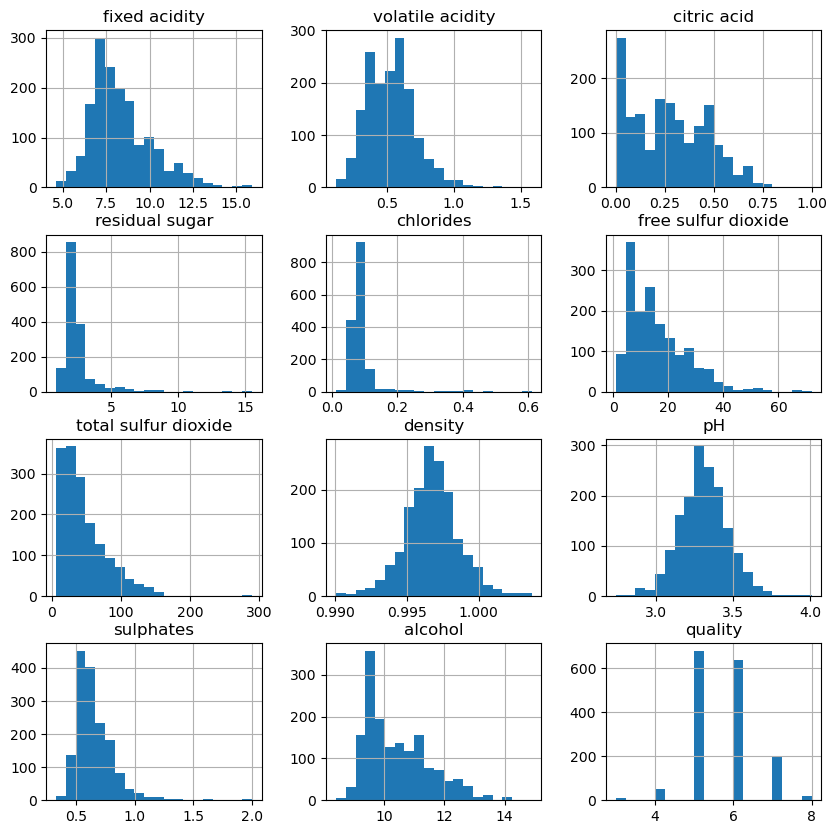

In [7]:
wine.hist(bins=20,figsize=(10,10))

# **Visualización de datos**

## Scatter de ácido volátil, ácido citrico y calidad del vino

Vemos una pequeña relación entre el ácido volatil con el citrico, cuando menos acido cítrico por norma general es mayor el ácido volatil, mientras que si se acerca el vino al pico del ácido volatil, pierde calidad

<Axes: xlabel='citric acid', ylabel='volatile acidity'>

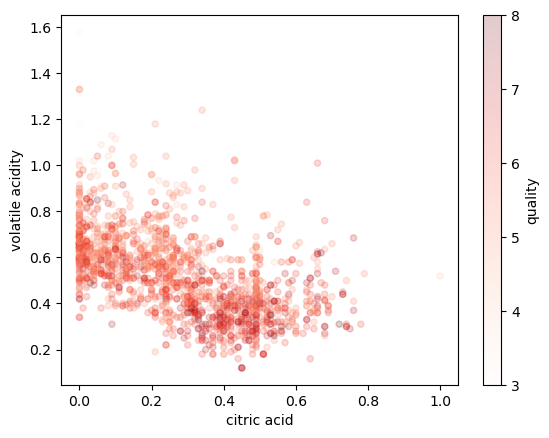

In [8]:
wine.plot.scatter(y="volatile acidity",x="citric acid",alpha=0.2,c="quality",cmap="Reds")

## BoxPlot de coorrelaciones

Tenemos un BoxPlot de las coorrelaciones de la calidad del vino con las diferentes columnas que ya hay en la propia tabla, esto nos permite eliminar los Ouliers que eliminaremos más adelante

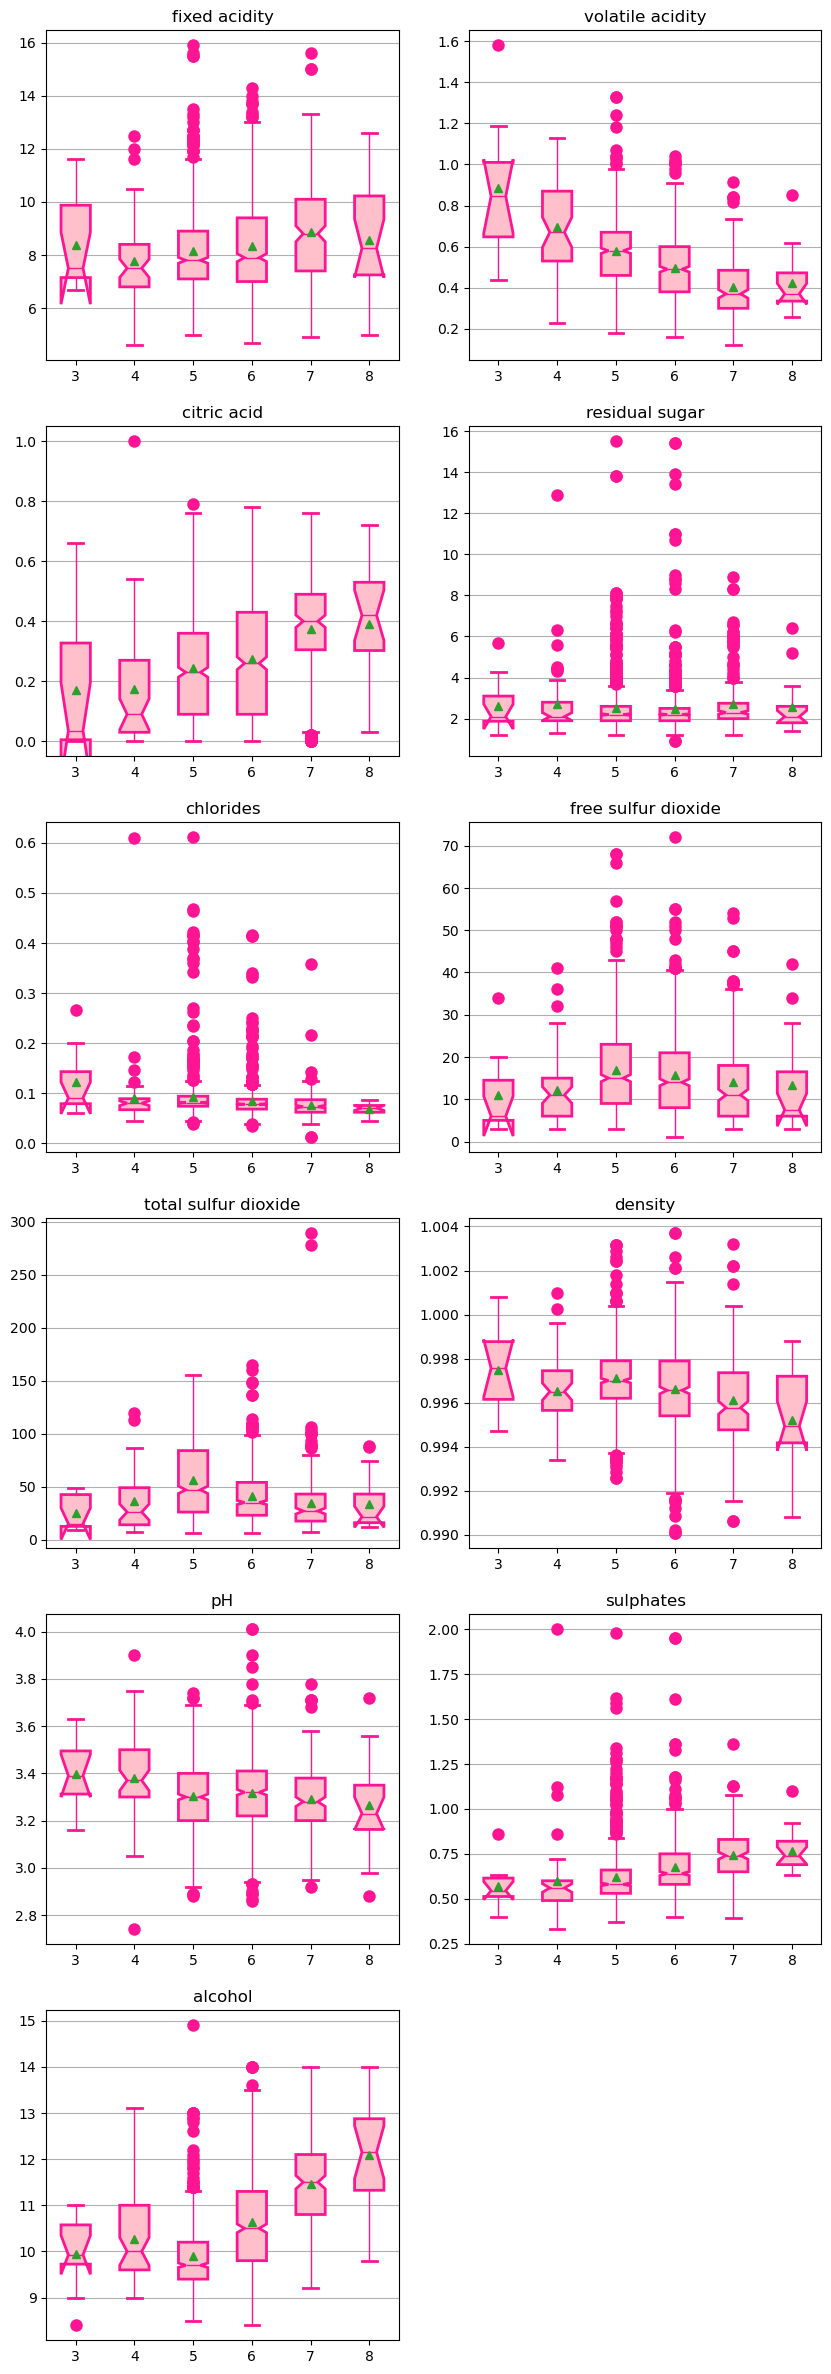

In [9]:
from matplotlib import pyplot as plt

from Clases.Matplot.BoxPlot import BoxPlot


BoxPlot.box_plot(types=wine.columns,by="quality",dataFrame=wine,deepColor="deeppink",faceColor="Pink",color="Pink",ballsColor="deeppink")


## Matriz de correlación y mapa de calor

Con el mapa de calor de las relaciones podemos los campos que más se relacionan entre ellos y los que son más importantes para calidad así permitiendo descartar columnas no muy importantes

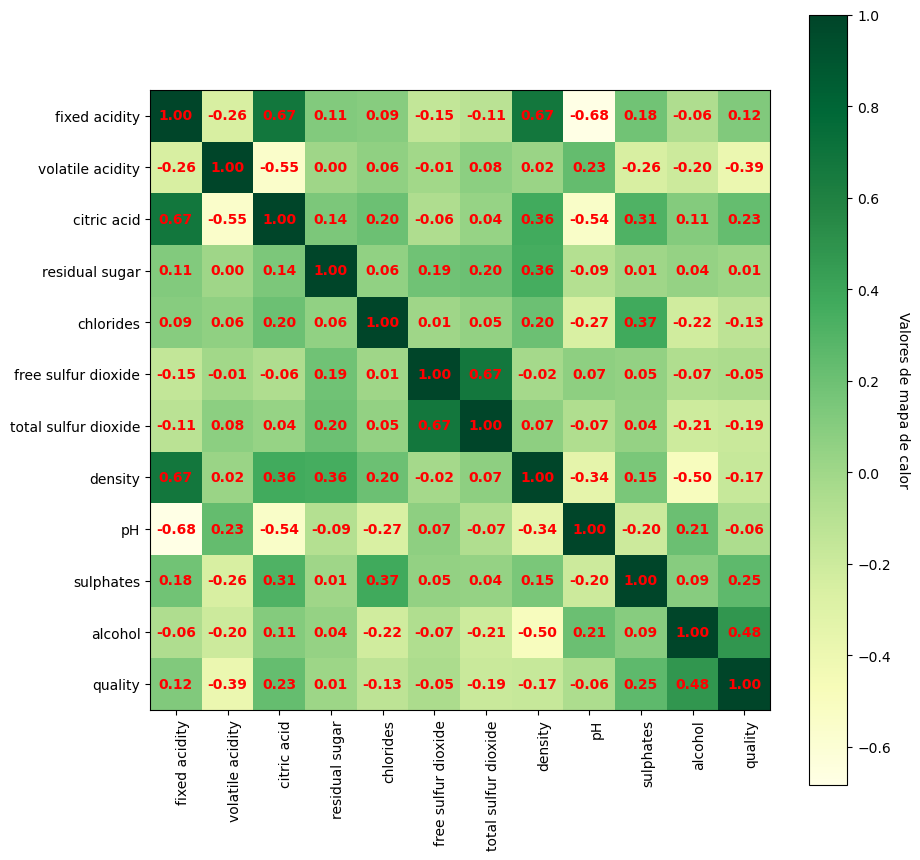

In [10]:
from Clases.Matplot.HeatMap import HeatMap


corr_matrix = wine.corr()
HeatMap.heat_map(corr_matrix,corr_matrix.columns,corr_matrix,corr_matrix.columns,corr_matrix.columns,cmap="YlGn",figsize=(10,10),weight="bold",textColor="red")

## Scatter matrix

Scatter matrix de las columnas para ver los pícos de las columnas y diferencias entre relaciones

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

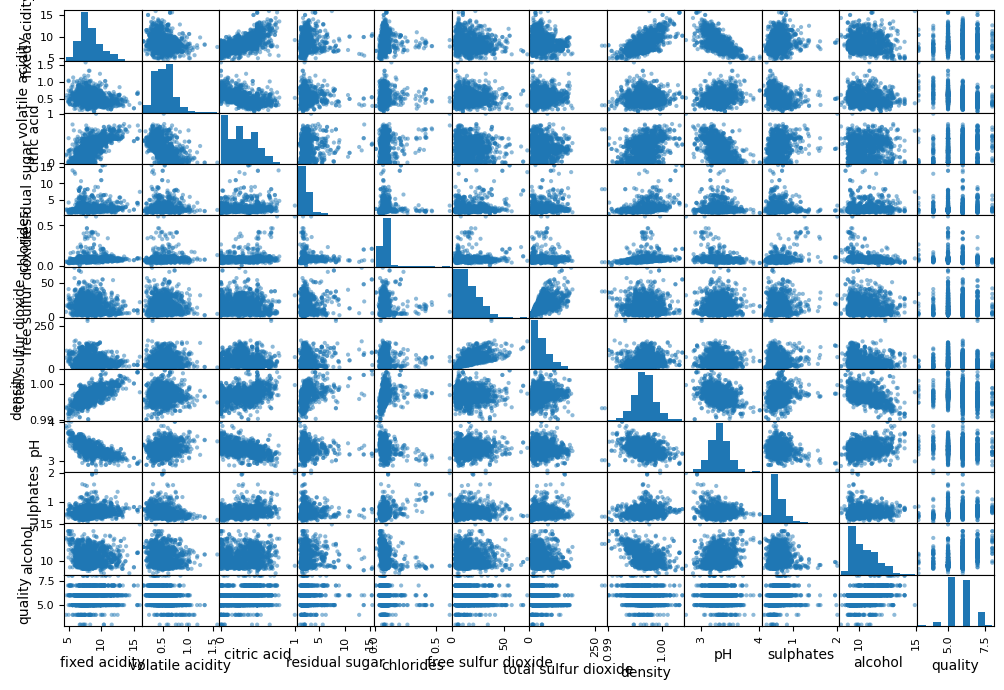

In [11]:
from pandas.plotting import scatter_matrix
columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
scatter_matrix(wine[columns], figsize=(12,8))

# **Experimentación con columnas**

En este caso me interesó probar con datos que me parecen que pueden tener relación entre ellos en este caso 
<li style="color:red">El total del sulfuro con su free sulfur</li>
<li style="color:red">El ácido fixed y el cítrico</li>
<li style="color:green">El ácido fixed y la densidad</li>

In [12]:
wine['free_sulfur_dioxide_per_total_sulfur_dioxide'] = wine['total sulfur dioxide']/wine['free sulfur dioxide']

wine['citric_acid_per_fixed_acidity'] = wine['fixed acidity']/wine['citric acid']

wine['density_per_fixed_acidity'] = wine['fixed acidity']/wine['density']

wine['acidity'] = wine['fixed acidity'] + wine['volatile acidity'] + wine['citric acid']

In [13]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free_sulfur_dioxide_per_total_sulfur_dioxide,citric_acid_per_fixed_acidity,density_per_fixed_acidity,acidity
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.029710,-0.265570,0.999975,0.996384
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,0.053302,0.308526,-0.257987,-0.204351
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.067317,-0.547972,0.672531,0.690438
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.050021,-0.075493,0.112075,0.124488
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.081575,-0.089861,0.092681,0.116675
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.217280,0.015757,-0.154580,-0.153614
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.331133,-0.087213,-0.114539,-0.096276
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.138697,-0.174274,0.663108,0.675596
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.108620,0.269624,-0.684398,-0.683484
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.055982,-0.146641,0.182801,0.181603


Vemos que dos de estas no salen con buenas relaciones, entonces los descartamos

In [14]:
wine.drop(['citric_acid_per_fixed_acidity',
           #'free_sulfur_dioxide_per_total_sulfur_dioxide',
           ],axis=1,inplace=True)



# **Preparación de datos**

## Limpieza

Vemos que los campos no tienen nulos por lo que no será necesario tratar los valores nulos de estos

In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   fixed acidity                                 1599 non-null   float64
 1   volatile acidity                              1599 non-null   float64
 2   citric acid                                   1599 non-null   float64
 3   residual sugar                                1599 non-null   float64
 4   chlorides                                     1599 non-null   float64
 5   free sulfur dioxide                           1599 non-null   float64
 6   total sulfur dioxide                          1599 non-null   float64
 7   density                                       1599 non-null   float64
 8   pH                                            1599 non-null   float64
 9   sulphates                                     1599 non-null   f

Definimos una función para el tratamiento de Outliers

In [16]:
import numpy as np
from scipy import stats


def tratamiento_outliers(columna,x,y):
    """Min y Max de una columna

    Args:
        columna (object): Columna a tratar
        x (float): Min
        y (float): Max

    Returns:
        List(float): Min y Max
    """
    sorted(columna)
    Q1,Q3 = np.percentile(columna,[x,y])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

def borrar_outliers(df,columns):
    """Borra los Outliers

    Args:
        df (DataFrame): DataFrame con los datos
        columns (X): Columnas

    Returns:
        DataFrame: Nuevo DataFrame con los datos borrados
    """
    for i,value in columns.items():
        if df[i].dtype == 'float64':
            low,high=tratamiento_outliers(df[i],value[0],value[1])
            df.drop(
                df[(df[i] > high) | (df[i] < low) ].index , 
                inplace=True)
            #df_filtrado = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    return df

In [17]:
#columnas=["quality","alcohol","sulphates","chlorides","residual sugar","citric acid","fixed acidity"]
#columnas = ["quality","alcohol","sulphates","pH","density","total sulfur dioxide","free sulfur dioxide","chlorides","residual sugar","citric acid","volatile acidity","fixed acidity"]
from matplotlib import axis


s = wine['quality']
wine.drop('quality',axis=1,inplace=True)
columnas = {#'citric acid':[10,90],
            'chlorides':[10,90],
            #'density':[17.5,82.5],
            #'alcohol':[10,90], 
            'free_sulfur_dioxide_per_total_sulfur_dioxide':[10,90],
            'sulphates':[2,98], 
            'free sulfur dioxide':[5,95],
            'residual sugar':[20,80],
            }
wine=borrar_outliers(wine,columnas)
wine['quality'] = s
columnas = list(wine.columns)
#columnas.remove('residual sugar')
#columnas.remove('free sulfur dioxide')
#columnas.remove('pH')
columnas

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'free_sulfur_dioxide_per_total_sulfur_dioxide',
 'density_per_fixed_acidity',
 'acidity',
 'quality']

In [18]:
wine.size

21345

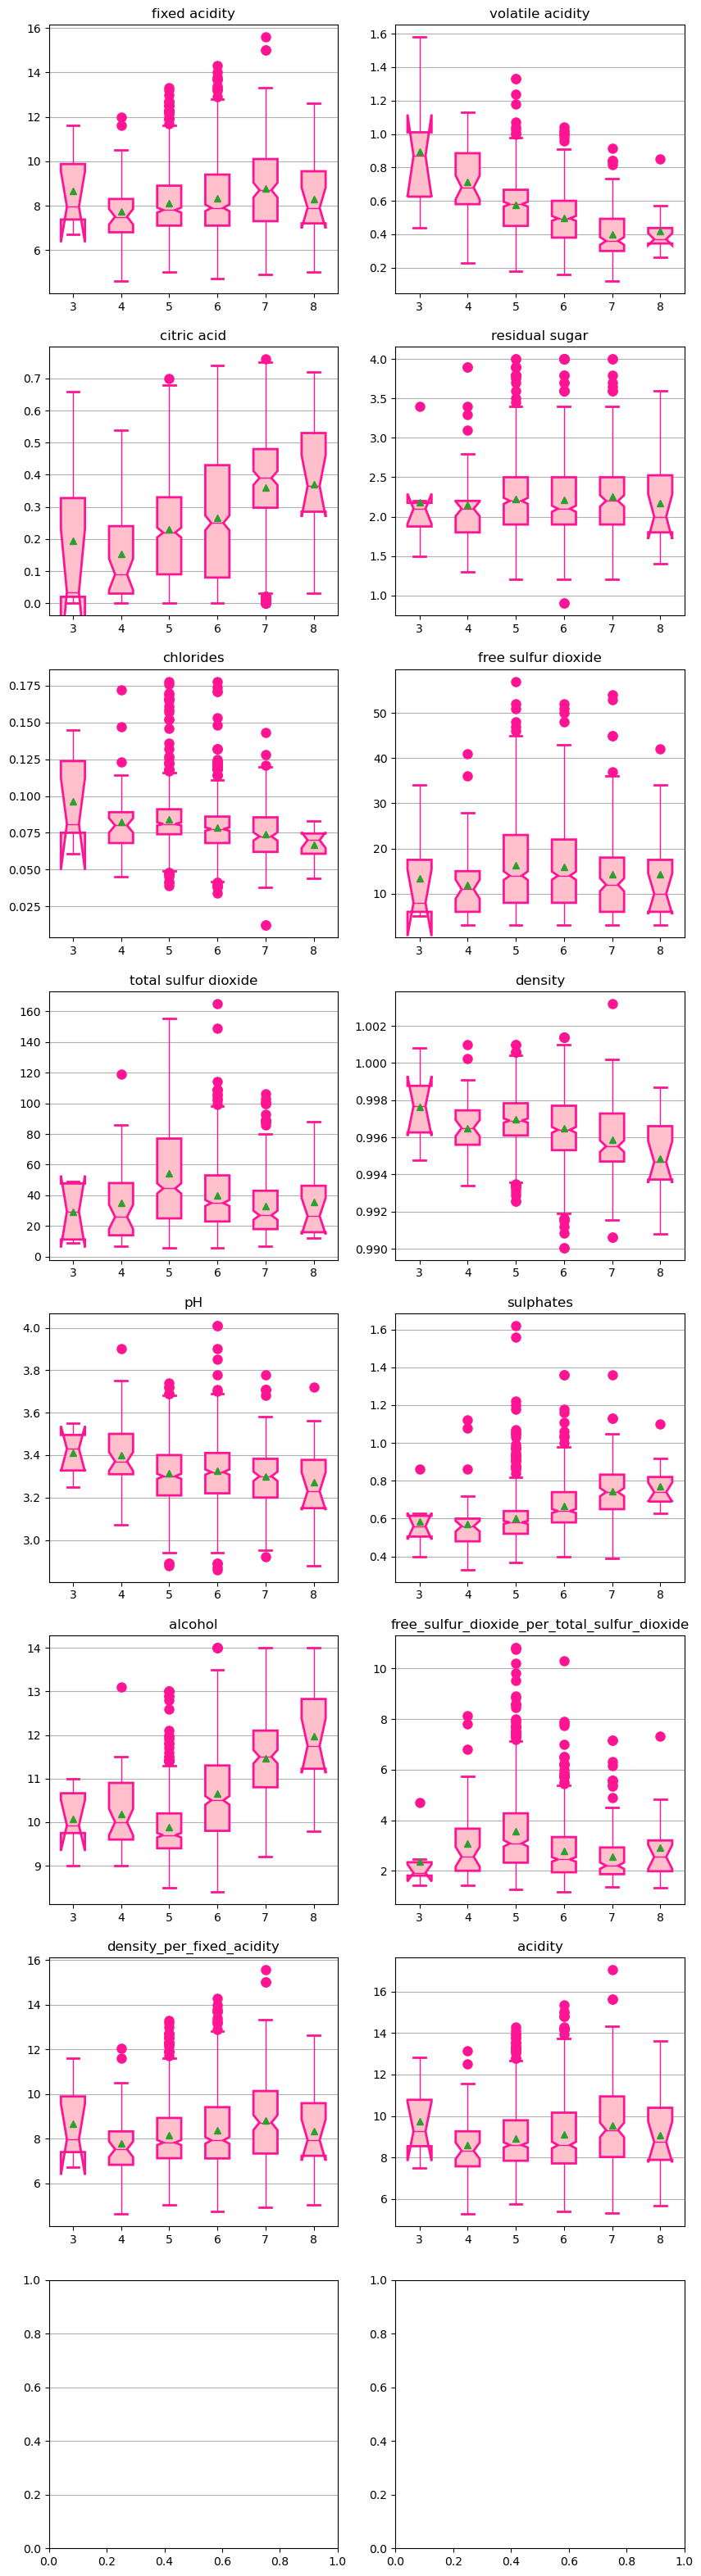

In [19]:
BoxPlot.box_plot(types=columnas,by="quality",dataFrame=wine,deepColor="deeppink",faceColor="Pink",color="Pink",ballsColor="deeppink")

In [20]:
#!pip install np_utils

In [21]:
from sklearn.calibration import LabelEncoder

le=LabelEncoder()
X=wine.drop('quality',axis=1)
Y=le.fit_transform(wine['quality'])

## División de datos

Definimos una función para dividir el entrenamiento con un ratio (Ya existe una función que lo hace por si solo)

In [22]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X, Y,random_state = 42)

In [23]:
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# **Definición de la Red Neuronal**

Sacamos los valores de cada Y que utilizaremos como class_names

In [24]:
class_names=np.unique(Y)

In [25]:
class_names

array([0, 1, 2, 3, 4, 5], dtype=int64)

Definimos como podemos observar la evolución de diferentes modelos

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1891 


c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.0497  


c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 1.0891


c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 1.3667


c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3001 


c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0355 


c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 1.0672


c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.2247  
MSE de SGD: 1.18672776222229
MSE de Adam: 1.0569899082183838
MSE de RMSprop: 1.098475694656372
MSE de Adagrad: 1.372385025024414
MSE de Adadelta: 1.3038530349731445
MSE de Nadam: 1.0271445512771606
MSE de Adamax: 1.0719352960586548
MSE de Ftrl: 1.224511981010437

El mejor modelo es: Nadam con un MSE de 1.0271445512771606


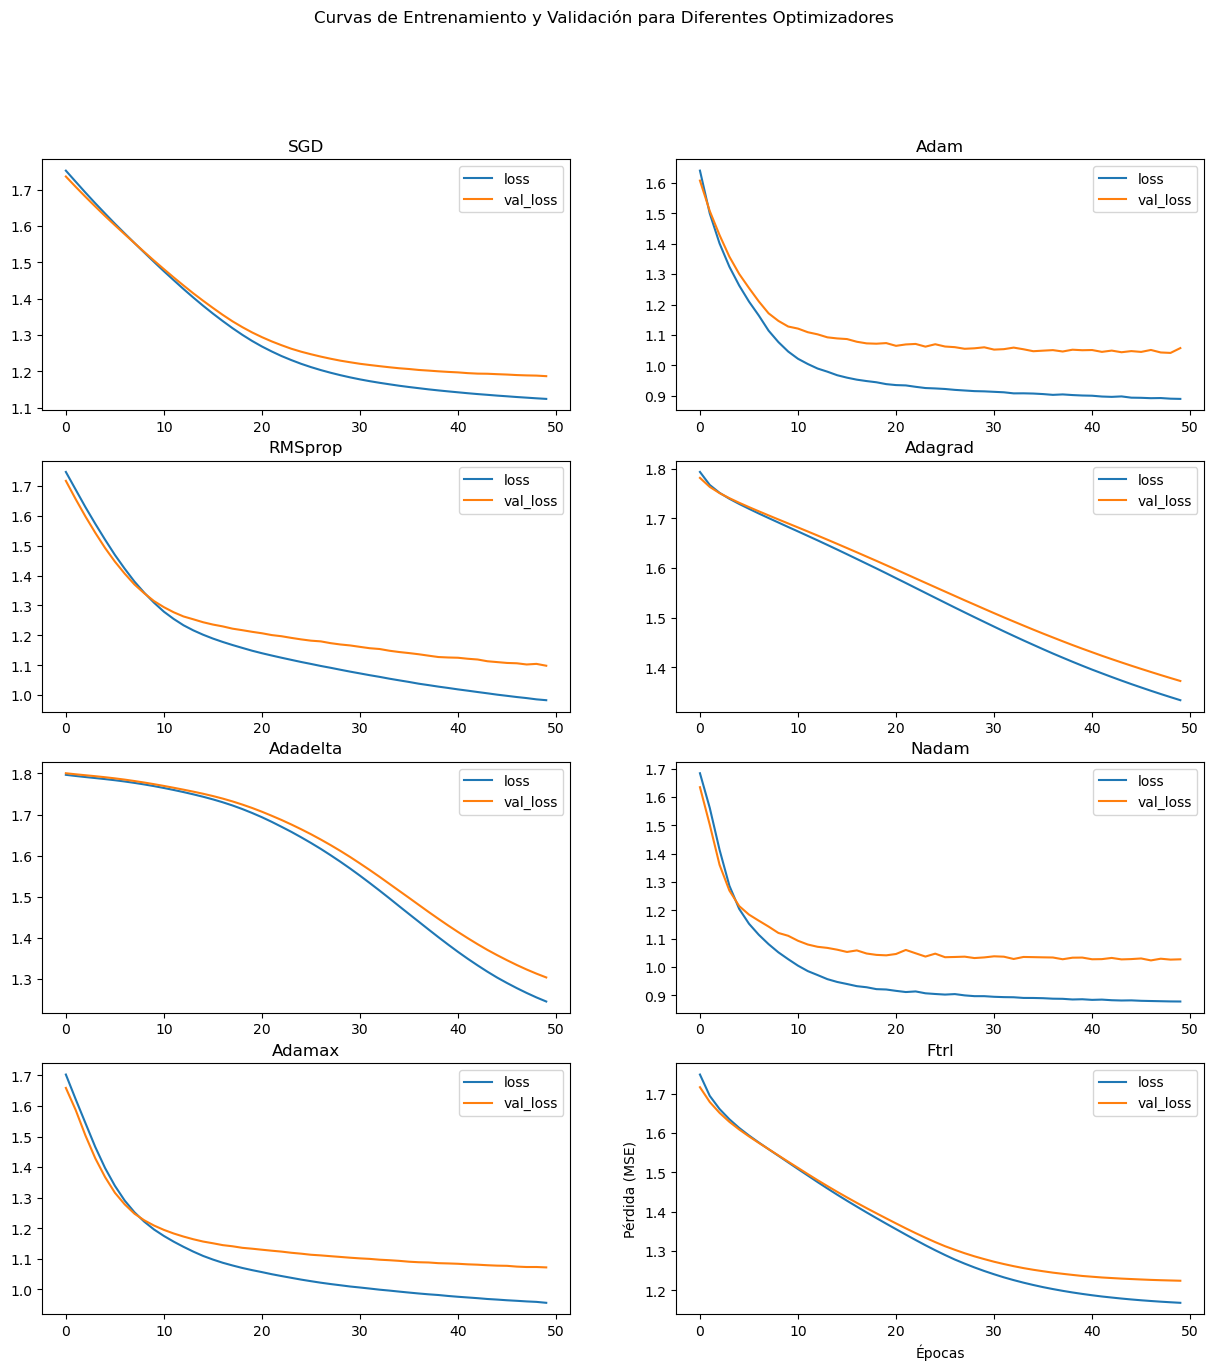

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import keras

# Lista de optimizadores a probar
optimizadores = [
    keras.optimizers.SGD(learning_rate=0.002),
    keras.optimizers.Adam(learning_rate=0.00025),
    keras.optimizers.RMSprop(learning_rate=0.0001),
    keras.optimizers.Adagrad(learning_rate=0.001),
    keras.optimizers.Adadelta(learning_rate=0.01),
    keras.optimizers.Nadam(learning_rate=0.00025),
    keras.optimizers.Adamax(learning_rate=0.00025),
    keras.optimizers.Ftrl(learning_rate=0.01),
]

# Configuración de filas y columnas
num_filas = 4
num_columnas = 2

# Crear una matriz de figuras
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 15))

# Convertir axs a unidimensional si num_filas o num_columnas es 1
if num_filas == 1:
    axs = axs.reshape((1, -1))
elif num_columnas == 1:
    axs = axs.reshape((-1, 1))

mse_modelos = {}

# Iterar sobre los optimizadores y las ubicaciones de los subplots
for i, optimizer in enumerate(optimizadores):
    row = i // num_columnas
    col = i % num_columnas

    model = keras.models.Sequential([
        keras.layers.Dense(64,input_dim=X_train.shape[1],activation="relu"),
        keras.layers.Dense(32,activation="relu"),
        keras.layers.Dense(16,activation="relu"),
        keras.layers.Dense(len(class_names),activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    
    # Calcular el MSE en el conjunto de prueba
    mse_test = model.evaluate(X_test, y_test)
    
    # Almacenar el MSE en el diccionario
    mse_modelos[str(optimizer.__class__.__name__)] = mse_test
    
    # Agregar gráfico de entrenamiento y validación al subplot correspondiente
    pd.DataFrame(history.history).plot(ax=axs[row, col])  
    axs[row, col].set_title(str(optimizer.__class__.__name__))  # Añadir título para cada gráfico

# Configuraciones de la figura
fig.suptitle('Curvas de Entrenamiento y Validación para Diferentes Optimizadores')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')

# Encontrar el modelo con el MSE más bajo
mejor_modelo = min(mse_modelos, key=mse_modelos.get)

# Mostrar los MSE de cada modelo y el mejor modelo
for modelo, mse in mse_modelos.items():
    print(f"MSE de {modelo}: {mse}")

print(f"\nEl mejor modelo es: {mejor_modelo} con un MSE de {mse_modelos[mejor_modelo]}")

plt.show()  # Muestra la figura con todas las gráficas

Definimos las capas principales de la red neuronal actual

In [27]:
import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(64,input_dim=X_train.shape[1],activation="relu"))
model.add(keras.layers.Dense(32,activation="relu"))
model.add(keras.layers.Dense(16,activation="relu"))

#Softmax convierte un vector de valores en una probabilidad de distribución
model.add(keras.layers.Dense(len(class_names),activation="softmax"))

model.summary()

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,670 (14.34 KB)

 Trainable params: 3,670 (14.34 KB)

 Non-trainable params: 0 (0.00 B)

Vemos una siple representación de las capas actuales

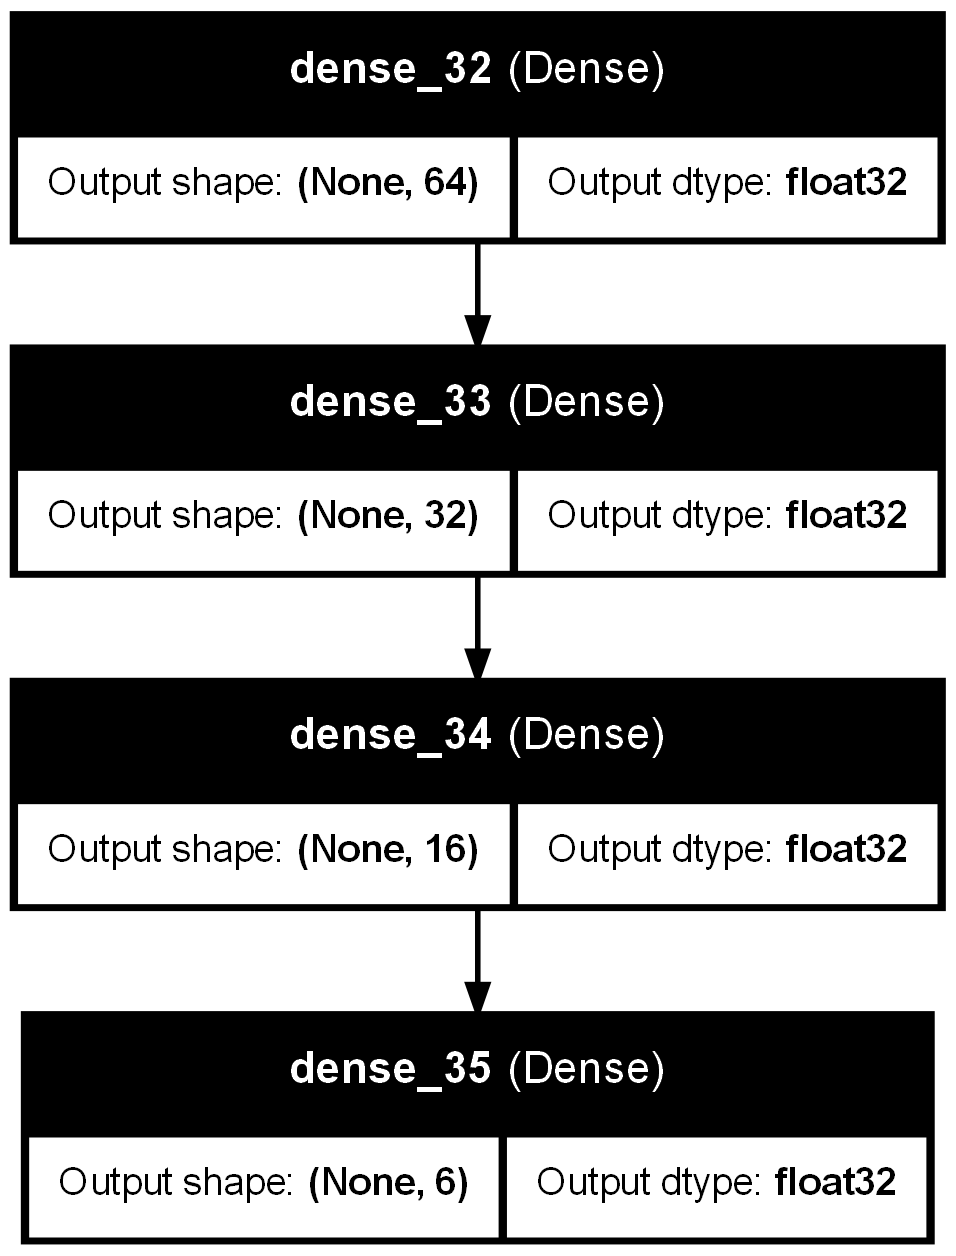

In [28]:
keras.utils.plot_model(model, "prediction.png", show_shapes=True,show_dtype=True,show_layer_names=True)

Compilamos el modelo con NAdams y con la metrica de accuracy a mayores

In [29]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

In [30]:
#from keras.utils import to_categorical

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)
#model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Nadam(learning_rate=0.0003), metrics=["accuracy"])

Entrenamo el modelo con un early_stopping con una paciencia de 5

In [31]:

import sys


early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=sys.maxsize,validation_data=(X_test,y_test),callbacks=[early_stopping_cb])

Epoch 1/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0129 - loss: 1.8207 - val_accuracy: 0.0478 - val_loss: 1.7878
Epoch 2/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0339 - loss: 1.7810 - val_accuracy: 0.2051 - val_loss: 1.7597
Epoch 3/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2458 - loss: 1.7483 - val_accuracy: 0.3315 - val_loss: 1.7333
Epoch 4/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3769 - loss: 1.7168 - val_accuracy: 0.3933 - val_loss: 1.7063
Epoch 5/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4360 - loss: 1.6833 - val_accuracy: 0.3933 - val_loss: 1.6762
Epoch 6/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4252 - loss: 1.6545 - val_accuracy: 0.3989 - val_loss: 1.6398
Epoch 7/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4503 - loss: 1.6150 - val_accuracy: 0.4185 - val_loss: 1.5953

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5851 - loss: 1.2791 - val_accuracy: 0.5562 - val_loss: 1.2860
Epoch 14/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5845 - loss: 1.2398 - val_accuracy: 0.5534 - val_loss: 1.2489
Epoch 15/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5874 - loss: 1.1876 - val_accuracy: 0.5506 - val_loss: 1.2216
Epoch 16/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5888 - loss: 1.1628 - val_accuracy: 0.5590 - val_loss: 1.1978
Epoch 17/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5888 - loss: 1.1241 - val_accuracy: 0.5506 - val_loss: 1.1806
Epoch 18/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5804 - loss: 1.1230 - val_accuracy: 0.5534 - val_loss: 1.1688
Epoch 19/9223372036854775807
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5647 - loss: 1.1060 - val_accuracy: 0.5562 - val_loss: 1.1565
Epoch 20/922337203685

Vemos el gráfico de barras del modelo actual

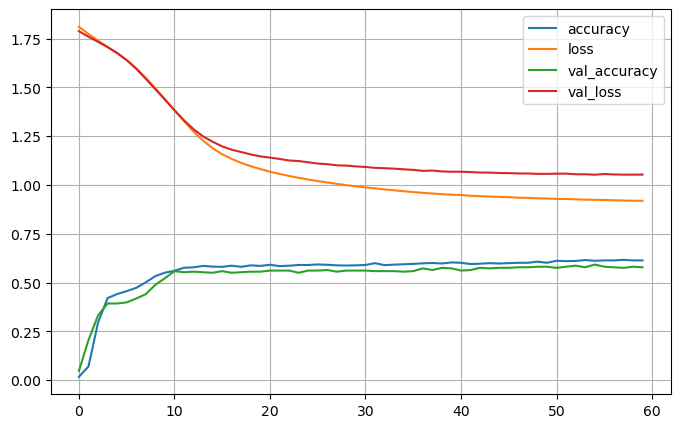

In [32]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [33]:
mse_test = model.evaluate(X_test,y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6165 - loss: 1.0442 


In [34]:
X_nuevas = X_test
y_pred = model.predict(X_nuevas)
y_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[0.02544805, 0.06169605, 0.5272755 , 0.30130324, 0.06463827,
        0.01963897],
       [0.00712211, 0.02584685, 0.7188874 , 0.22319819, 0.02131779,
        0.00362757],
       [0.0056604 , 0.0097586 , 0.04666269, 0.5494083 , 0.37931797,
        0.00919202],
       ...,
       [0.00721071, 0.02293565, 0.5215125 , 0.38729241, 0.05657185,
        0.00447687],
       [0.00931941, 0.03425007, 0.47833535, 0.4064779 , 0.06254694,
        0.00907035],
       [0.00518377, 0.02399792, 0.853911  , 0.10791808, 0.0069578 ,
        0.00203144]], dtype=float32)

In [35]:
y_pred.round(2)

array([[0.03, 0.06, 0.53, 0.3 , 0.06, 0.02],
       [0.01, 0.03, 0.72, 0.22, 0.02, 0.  ],
       [0.01, 0.01, 0.05, 0.55, 0.38, 0.01],
       ...,
       [0.01, 0.02, 0.52, 0.39, 0.06, 0.  ],
       [0.01, 0.03, 0.48, 0.41, 0.06, 0.01],
       [0.01, 0.02, 0.85, 0.11, 0.01, 0.  ]], dtype=float32)

Convertimos los valores transformados en las predicciones

In [36]:
y_pred = np.argmax(y_pred, axis=1)
np.array(class_names)[y_pred]

array([2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3,
       2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 4, 3, 2, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2,
       3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2,
       2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2,

In [37]:
x=0
for index,i in enumerate(y_test):
    if i != y_pred[index]:
        x+=1
print("DIFERENTES %i:%i"%(x,len(y_test)))

DIFERENTES 145:356


Y vemos la matriz de confusión de los resultados de la predicción

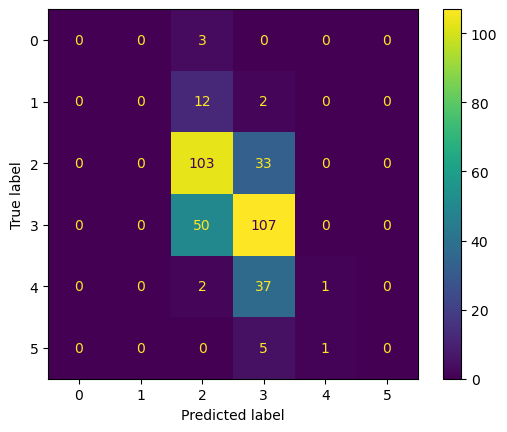

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()